In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/train_outliers_removed.csv")    

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1458.0,730.251715,421.601532,1.0,365.25,730.5,1094.75,1460.0
MSSubClass,1458.0,56.893004,42.329437,20.0,20.00,50.0,70.00,190.0
LotFrontage,1199.0,69.797331,23.203458,21.0,59.00,69.0,80.00,313.0
LotArea,1458.0,10459.936900,9859.198156,1300.0,7544.50,9475.0,11600.00,215245.0
OverallQual,1458.0,6.093964,1.376369,1.0,5.00,6.0,7.00,10.0
OverallCond,1458.0,5.576132,1.113359,1.0,5.00,5.0,6.00,9.0
YearBuilt,1458.0,1971.218107,30.193754,1872.0,1954.00,1972.5,2000.00,2010.0
YearRemodAdd,1458.0,1984.834019,20.641760,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1450.0,102.753793,179.442156,0.0,0.00,0.0,164.75,1600.0
BsmtFinSF1,1458.0,438.827160,432.969094,0.0,0.00,382.0,711.00,2188.0


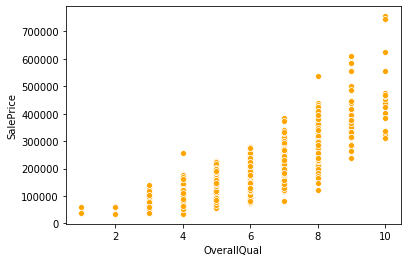

In [5]:
sns.scatterplot(x="OverallQual" , y="SalePrice" , data=df , color="orange");

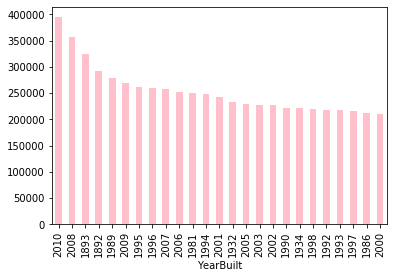

In [6]:
df.groupby("YearBuilt").mean()["SalePrice"].sort_values(ascending=False)[:25].plot(kind="bar", color="pink");

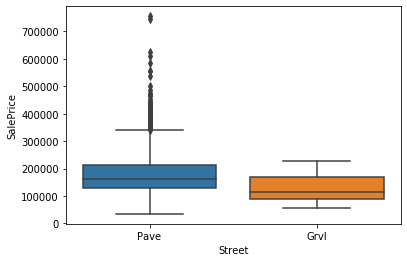

In [7]:
sns.boxplot(x="Street", y="SalePrice", data=df);

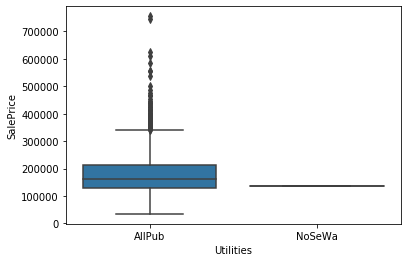

In [8]:
sns.boxplot(x="Utilities", y="SalePrice", data=df);

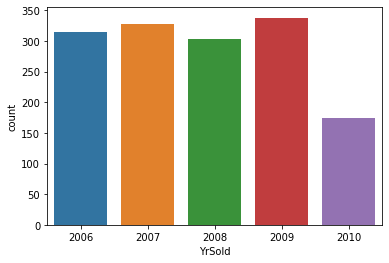

In [9]:
sns.countplot(x="YrSold", data=df);

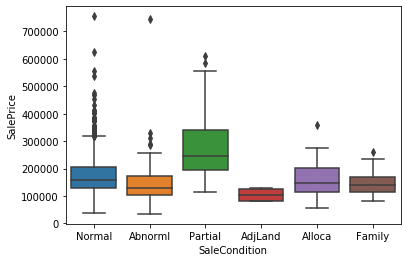

In [10]:
sns.boxplot(x="SaleCondition", y="SalePrice", data=df);

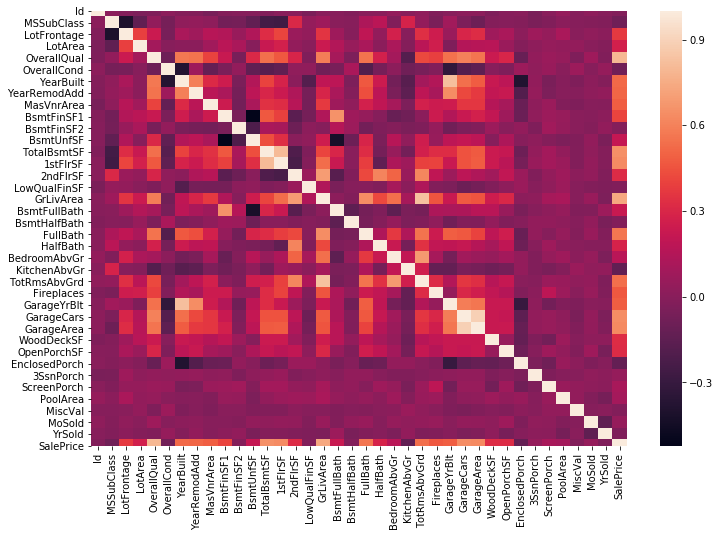

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr());